In [3]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import nets
import pipeline
import importlib
importlib.reload(pipeline)
importlib.reload(nets)

<module 'nets' from '/content/nets.py'>

In [13]:
start_width = 1
end_width = 30
train_size = 15000
test_size = 5000
epochs = 1000

p_noise = 0.2/0.9

models = {}
for i in range(start_width, end_width + 1):
  models[i] = pipeline.CifarModel()
  models[i].load_net(nets.CNN(c = i))
  models[i].load_data(train_size = train_size, test_size = test_size, p_noise = p_noise)

Loading CIFAR10 from torchvision: 15000 train, 5000 test.
Files already downloaded and verified
Files already downloaded and verified
Loading CIFAR10 from torchvision: 15000 train, 5000 test.
Files already downloaded and verified
Files already downloaded and verified


In [9]:
import datetime

train_errors = []
test_errors = []
aucs = []
for width, model in models.items():
  print(datetime.datetime.now())
  model.train(nn.CrossEntropyLoss(), epochs = epochs, verbose = False)
  train_errors.append(model.train_error())
  test_errors.append(model.test_error())
  aucs.append(model.auc(big=True))
  print('Model(width={0})'.format(width))
  print({'train_errors': train_errors, 'test_errors': test_errors, 'aucs': aucs})
  print()

2019-12-15 18:15:57.287974
Finished Training
Model(width=1)
{'train_errors': [0.8478], 'test_errors': [0.8402000000000001], 'aucs': [0.49799824]}

2019-12-15 18:16:24.408465
Finished Training
Model(width=2)
{'train_errors': [0.8478, 0.7638], 'test_errors': [0.8402000000000001, 0.7456], 'aucs': [0.49799824, 0.50649378]}

2019-12-15 18:16:51.619833
Finished Training
Model(width=3)
{'train_errors': [0.8478, 0.7638, 0.7108], 'test_errors': [0.8402000000000001, 0.7456, 0.6758], 'aucs': [0.49799824, 0.50649378, 0.49136564000000005]}



In [10]:
widths = list(models.keys())
train_errors = [models[key].train_error() for key in widths]
test_errors = [models[key].test_error() for key in widths]
aucs = [models[key].auc(big = True) for key in widths]
print(widths)
print(train_errors)
print(test_errors)
print(aucs)

[1, 2, 3]
[0.8476, 0.7688, 0.7103999999999999]
[0.8418, 0.7442, 0.6748000000000001]
[0.49799824, 0.50649378, 0.49136564000000005]


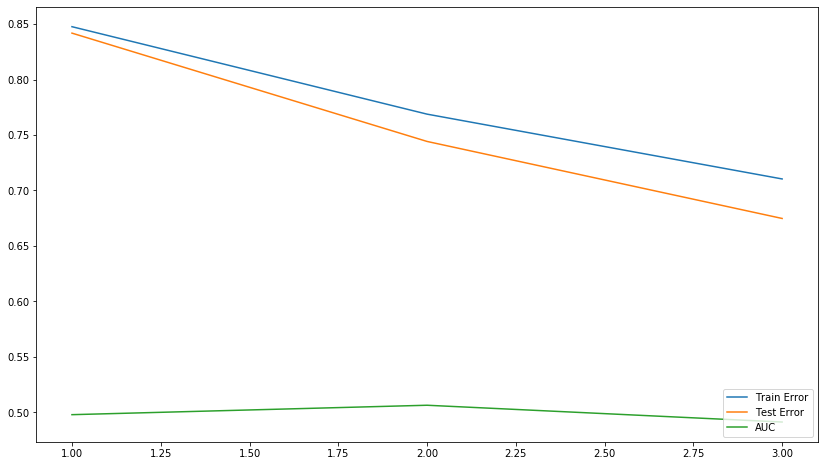

In [11]:
plt.figure(figsize=(14,8))
plt.plot(widths, train_errors, label = 'Train Error')
plt.plot(widths, test_errors, label = 'Test Error')
plt.plot(widths, aucs, label = 'AUC')
plt.legend(loc = 'lower right')
plt.show()